In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("input/train.csv")

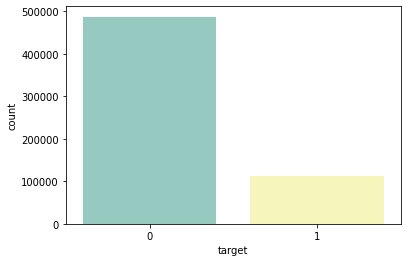

In [19]:
 ax = sns.countplot(x="target", data=df, palette="Set3")

In [20]:
# Therefore we will use stratified k_folds

In [3]:
df = pd.read_csv("input/train_folds.csv")

In [28]:
df[df.kfold==0].target.value_counts()

0    97536
1    22464
Name: target, dtype: int64

In [29]:
df[df.kfold==1].target.value_counts()

0    97536
1    22464
Name: target, dtype: int64

In [30]:
# data has been splitted using the orifinal ratio


In [33]:
df.loc[:,"bin_0"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
599995    0.0
599996    0.0
599997    0.0
599998    0.0
599999    0.0
Name: bin_0, Length: 600000, dtype: float64

In [4]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,kfold
0,395030,0.0,0.0,0.0,T,NaN,Red,Trapezoid,Dog,Costa Rica,...,2.0,Novice,Warm,h,U,US,5.0,5.0,0,0
1,512973,0.0,0.0,0.0,T,N,Red,Trapezoid,Hamster,India,...,3.0,Master,Warm,o,P,sc,7.0,6.0,1,0
2,345913,0.0,0.0,0.0,F,Y,Green,Circle,Lion,Costa Rica,...,NaN,Grandmaster,Warm,m,C,dp,3.0,7.0,0,0
3,166159,0.0,0.0,0.0,T,Y,Red,Polygon,Axolotl,India,...,3.0,Master,Lava Hot,e,M,DN,1.0,8.0,0,0
4,502358,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Costa Rica,...,1.0,Master,NaN,o,P,LS,5.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,74240,0.0,0.0,1.0,F,Y,Blue,Circle,Axolotl,India,...,3.0,Expert,Warm,h,O,rg,3.0,12.0,1,4
599996,251865,0.0,0.0,0.0,T,Y,Red,Square,Axolotl,Finland,...,2.0,Novice,Hot,f,F,Nh,3.0,3.0,0,4
599997,374105,0.0,0.0,1.0,F,N,Red,Circle,Hamster,Russia,...,1.0,Grandmaster,Cold,k,B,OZ,6.0,9.0,0,4
599998,181747,0.0,0.0,0.0,T,N,Red,Polygon,Hamster,India,...,1.0,Novice,Freezing,l,Y,vx,6.0,11.0,0,4


In [5]:
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing

In [6]:
features = [feature for feature in df.columns if feature not in ("id","target","kfold")]

for col in features:
    df[col] = df[col].astype(str).fillna("NONE")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      600000 non-null  int64 
 1   bin_0   600000 non-null  object
 2   bin_1   600000 non-null  object
 3   bin_2   600000 non-null  object
 4   bin_3   600000 non-null  object
 5   bin_4   600000 non-null  object
 6   nom_0   600000 non-null  object
 7   nom_1   600000 non-null  object
 8   nom_2   600000 non-null  object
 9   nom_3   600000 non-null  object
 10  nom_4   600000 non-null  object
 11  nom_5   600000 non-null  object
 12  nom_6   600000 non-null  object
 13  nom_7   600000 non-null  object
 14  nom_8   600000 non-null  object
 15  nom_9   600000 non-null  object
 16  ord_0   600000 non-null  object
 17  ord_1   600000 non-null  object
 18  ord_2   600000 non-null  object
 19  ord_3   600000 non-null  object
 20  ord_4   600000 non-null  object
 21  ord_5   600000 non-null  object
 

In [10]:
df_test = pd.read_csv("/home/hazim/Desktop/Categorical-Feature-Encoding-Challenge-II/input/test.csv")

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      400000 non-null  int64  
 1   bin_0   388099 non-null  float64
 2   bin_1   387962 non-null  float64
 3   bin_2   388028 non-null  float64
 4   bin_3   388049 non-null  object 
 5   bin_4   388049 non-null  object 
 6   nom_0   387938 non-null  object 
 7   nom_1   388053 non-null  object 
 8   nom_2   387821 non-null  object 
 9   nom_3   387824 non-null  object 
 10  nom_4   388007 non-null  object 
 11  nom_5   388088 non-null  object 
 12  nom_6   387988 non-null  object 
 13  nom_7   387997 non-null  object 
 14  nom_8   388044 non-null  object 
 15  nom_9   387940 non-null  object 
 16  ord_0   388107 non-null  float64
 17  ord_1   387833 non-null  object 
 18  ord_2   387895 non-null  object 
 19  ord_3   387947 non-null  object 
 20  ord_4   388067 non-null  object 
 21  ord_5   38

In [12]:
for col in features:
    df_test[col] = df_test[col].astype(str).fillna("NONE")

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      400000 non-null  int64 
 1   bin_0   400000 non-null  object
 2   bin_1   400000 non-null  object
 3   bin_2   400000 non-null  object
 4   bin_3   400000 non-null  object
 5   bin_4   400000 non-null  object
 6   nom_0   400000 non-null  object
 7   nom_1   400000 non-null  object
 8   nom_2   400000 non-null  object
 9   nom_3   400000 non-null  object
 10  nom_4   400000 non-null  object
 11  nom_5   400000 non-null  object
 12  nom_6   400000 non-null  object
 13  nom_7   400000 non-null  object
 14  nom_8   400000 non-null  object
 15  nom_9   400000 non-null  object
 16  ord_0   400000 non-null  object
 17  ord_1   400000 non-null  object
 18  ord_2   400000 non-null  object
 19  ord_3   400000 non-null  object
 20  ord_4   400000 non-null  object
 21  ord_5   400000 non-null  object
 